In [1]:
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

#판다스 치트 시트

# pandas_dataframe_and_rows

## Syntax – Creating DataFrames
 - **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(
        {"a" : [4 ,5, 6],
        "b" : [7, 8, 9],
        "c" : [10, 11, 12]},
        index = [1, 2, 3])

In [4]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [5]:
df.loc[3, "a"]

6

In [6]:
df.loc[[1, 2], ["a", "b"]]

,a,b
1,4,7
2,5,8


In [7]:
df.loc[1, "b"]

7

In [8]:
df = pd.DataFrame(
        [[4, 7, 10],
        [5, 8, 11],
        [6, 9, 12]],
        index=[1, 2, 3],
        #columns를 따로 지정 가능
        columns=['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [9]:
import numpy as np
df = pd.DataFrame(
        {"a" : [4 ,5, 6, 6, np.nan],
        "b" : [7, 8, np.nan, 9, 9],
        "c" : [10, 11, 12, np.nan, 12]},
        index = pd.MultiIndex.from_tuples(
        [('d',1),('d',2),('e',2),('e',3),('e',4)],
        names=['n','v']))
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  4  NaN  9.0  12.0

## Subset Observations (Rows)

In [10]:
df[df['c'] >= 7]

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  4  NaN  9.0  12.0

In [11]:
df['c'] >= 7

n  v
d  1     True
   2     True
e  2     True
   3    False
   4     True
Name: c, dtype: bool

In [12]:
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [13]:
df = pd.DataFrame(
        {"a" : [4 ,5, 6, 6],
        "b" : [7, 8, 9, 9],
        "c" : [10, 11, 12, 12]},
        index = pd.MultiIndex.from_tuples(
        [('d',1),('d',2),('e',2),('e',3)],
        names=['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [14]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [15]:
df.drop_duplicates()

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [16]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
  3  6  9  12

In [17]:
#inplace=True를 해줘야 바로 반영된다. 하지만 거의 사용 안함
#df.drop_duplicates(inplace=True)

In [18]:
#함수 뒤에 ?를 붙이면 도움말이 나온다.
df.drop_duplicates?

In [19]:
df = df.drop_duplicates(keep='last')
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 3  6  9  12

In [20]:
df.head()

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 3  6  9  12

In [21]:
df["b"] != 7

n  v
d  1    False
   2     True
e  3     True
Name: b, dtype: bool

In [22]:
df[df["b"] != 7]

,,a,b,c
n,v,,,
d,2,5,8,11
e,3,6,9,12


In [23]:
#특정 칼럼에 해당 값이 있는지 확인
#df.a.isin([5])
df['a'].isin([5])

n  v
d  1    False
   2     True
e  3    False
Name: a, dtype: bool

In [24]:
pd.isnull(df)

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 3  False  False  False

In [25]:
import numpy as np
df = pd.DataFrame(
        {"a" : [4 ,5, 6, 6, np.nan],
        "b" : [7, 8, np.nan, 9, 9],
        "c" : [10, 11, 12, np.nan, 12]},
        index = pd.MultiIndex.from_tuples(
        [('d',1),('d',2),('e',2),('e',3),('e',4)],
        names=['n','v']))
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [26]:
pd.isnull(df)

a      b      c
n v                     
d 1  False  False  False
  2  False  False  False
e 2  False   True  False
  3  False  False   True
  4   True  False  False

In [27]:
df['a'].isnull().sum()

1

In [28]:
#df.notnull()
pd.notnull(df)

a      b      c
n v                     
d 1   True   True   True
  2   True   True   True
e 2   True  False   True
  3   True   True  False
  4  False   True   True

In [29]:
df.notnull().sum()

a    4
b    4
c    4
dtype: int64

 - &,   |,    ~,   ^, df.any(),  df.all()
 - and, or, not, xor, any,       all

In [30]:
df[df.b == 7] | df[df.a == 5]

a   b   c
n v            
d 1 NaN NaN NaN
  2 NaN NaN NaN

In [31]:
df

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0
e 2  6.0  NaN  12.0
  3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [32]:
#head의 기본값은 5
df.head(2)

a    b     c
n v                
d 1  4.0  7.0  10.0
  2  5.0  8.0  11.0

In [33]:
df.tail(2)

a    b     c
n v                
e 3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [34]:
#frac은 특정 비율(ex)frac=??)로 랜덤하게 가져온다.
df.sample(frac=0.3)

,,a,b,c
n,v,,,
d,2,5.0,8.0,11.0
e,2,6.0,NaN,12.0


In [35]:
# n(데이터 개수) 매개변수에 따라 가져온다.
df.sample(n=2)

,,a,b,c
n,v,,,
d,1,4.0,7.0,10.0
e,4,NaN,9.0,12.0


In [36]:
df.iloc[-2:]

a    b     c
n v                
e 3  6.0  9.0   NaN
  4  NaN  9.0  12.0

In [37]:
df = pd.DataFrame({'a': [1, 10, 8, 11, -1],
                   'b': list('abdce'),
                   'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
df

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,d,NaN
3,11,c,3.0
4,-1,e,4.0


In [38]:
#가장 큰 값을 n개 가져온다.
df.nlargest(1, 'c')

,a,b,c
4,-1,e,4.0


In [39]:
df.nsmallest(3, 'a')

,a,b,c
4,-1,e,4.0
0,1,a,1.0
2,8,d,NaN


## Subset Variables (Columns)

In [40]:
import pandas as pd
import seaborn as sns

In [41]:
#Kaggle의 경우 (setting)인터넷 연결을 해줘야 iris 데이터를 가져올 수 있다.
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
#특정 칼럼만 가져온다.
columns = ['sepal_width','sepal_length','species']
df[columns].head()

,sepal_width,sepal_length,species
0,3.5,5.1,setosa
1,3.0,4.9,setosa
2,3.2,4.7,setosa
3,3.1,4.6,setosa
4,3.6,5.0,setosa


In [43]:
#df.sepal_width
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [44]:
#칼럼 기준으로 특정 조건에 해당하는 칼럼 데이터만 가져오고 싶을 때...
df.filter(regex='length$' )

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


In [45]:
df.filter(regex='^sepal' )

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [46]:
df.filter(regex='^(?!species$).*' )

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
# loc는 인덱스까지 가져온다.
df.loc[:3,'sepal_width':'petal_width']

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2


In [49]:
# iloc는 인덱스 전까지 가져온다.
df.iloc[:3,[1,3,4]]

,sepal_width,petal_width,species
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa


In [50]:
df.loc[df['sepal_length'] > 5, ['sepal_length','sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
5,5.4,3.9
10,5.4,3.7
14,5.8,4.0
15,5.7,4.4


## Summarize Data

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np

In [52]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
# Count number of rows with each unique value of variable
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [55]:
pd.DataFrame(df['species'].value_counts())

,species
setosa,50
versicolor,50
virginica,50


In [56]:
# of rows in DataFrame.
len(df)

150

In [57]:
# of distinct values in a column.
df['species'].nunique()

3

In [58]:
# 기본 - 수치형 데이터에 대한 통계값
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
# include => all, number, object, category
# include = [np.object]
# exclude
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


 - sum() : Sum values of each object.
 - count() : Count non-NA/null values of each object.
 - median() : Median value of each object.
 - quantile([0.25,0.75]) : Quantiles of each object.
 - apply(function) : Apply function to each object.
 - min() : Minimum value in each object.
 - max() : Maximum value in each object.
 - mean() : Mean value of each object.
 - var() : Variance of each object.
 - std() : Standard deviation of each
 - object.


In [60]:
df['petal_width'].sum()

179.90000000000003

In [61]:
df['petal_width'].count()

150

In [62]:
df['petal_width'].median()

1.3

In [63]:
df['petal_width'].mean()

1.199333333333334

In [64]:
df['petal_width'].quantile([0.25,0.75])

0.25    0.3
0.75    1.8
Name: petal_width, dtype: float64

In [65]:
df['petal_width'].min()

0.1

In [66]:
df.min()

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

In [67]:
pd.DataFrame(df.min())

,0
sepal_length,4.3
sepal_width,2
petal_length,1
petal_width,0.1
species,setosa


In [68]:
df['petal_width'].max()

2.5

In [69]:
df['petal_width'].var()

0.5810062639821029

In [70]:
df['petal_width'].std()

0.7622376689603465

### apply(function)

In [71]:
df.apply?
# df['petal_width'].apply(function)

In [72]:
df.apply(lambda x: x[0])

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
dtype: object

In [73]:
df['species'].apply(lambda x: x[:3])

0      set
1      set
2      set
3      set
4      set
5      set
6      set
7      set
8      set
9      set
10     set
11     set
12     set
13     set
14     set
15     set
16     set
17     set
18     set
19     set
20     set
21     set
22     set
23     set
24     set
25     set
26     set
27     set
28     set
29     set
      ... 
120    vir
121    vir
122    vir
123    vir
124    vir
125    vir
126    vir
127    vir
128    vir
129    vir
130    vir
131    vir
132    vir
133    vir
134    vir
135    vir
136    vir
137    vir
138    vir
139    vir
140    vir
141    vir
142    vir
143    vir
144    vir
145    vir
146    vir
147    vir
148    vir
149    vir
Name: species, Length: 150, dtype: object

In [74]:
def smp(x):
    # 뒤에서 3번째까지의 문자를 가져오는 함수
    x = x[-3:]
    return x

In [75]:
df['species_3'] = df['species'].apply(lambda x: x[:3])

In [76]:
df['species_-3'] = df['species'].apply(smp)

In [77]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_3,species_-3
0,5.1,3.5,1.4,0.2,setosa,set,osa
1,4.9,3.0,1.4,0.2,setosa,set,osa
2,4.7,3.2,1.3,0.2,setosa,set,osa
3,4.6,3.1,1.5,0.2,setosa,set,osa
4,5.0,3.6,1.4,0.2,setosa,set,osa


## Handling Missing Data

In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.DataFrame([])

In [80]:
df.dropna?

In [81]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0]
                  ,[3, 4, np.nan, 1]
                  ,[np.nan, np.nan, np.nan, 5]],
                 columns = list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [82]:
# Drop rows with any column having NA/null data
# axis = 0 로우 / axis = 1 column
df.dropna(axis=1, how='any')

,D
0,0
1,1
2,5


In [83]:
df.dropna(axis=0, how='any')

,A,B,C,D


In [84]:
# Replace all NA/null data with value
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5


In [85]:
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5


In [86]:
fill_na_value = df['D'].mean()
fill_na_value

2.0

In [87]:
df.fillna(fill_na_value)

,A,B,C,D
0,2.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,2.0,2.0,2.0,5


In [88]:
df.isnull().sum()

A    2
B    1
C    3
D    0
dtype: int64

## Make New Columns

In [89]:
import pandas as pd
import numpy as np

In [90]:
# Compute and append one or more new columns.
df.assign?

In [91]:
df = pd.DataFrame({'A': range(1, 11), 'B': np.random.randn(10)})
df.head()

,A,B
0,1,-0.539837
1,2,0.677551
2,3,1.196902
3,4,-1.871757
4,5,-0.898894


In [92]:
# df.ln_A = np.log(df.A)
# df['ln_A'] = np.log(df.A)
df = df.assign(ln_A = lambda x: np.log(x.A))
df

,A,B,ln_A
0,1,-0.539837,0.000000
1,2,0.677551,0.693147
2,3,1.196902,1.098612
3,4,-1.871757,1.386294
4,5,-0.898894,1.609438
5,6,0.255461,1.791759
6,7,1.173688,1.945910
7,8,0.382936,2.079442
8,9,-1.270210,2.197225
9,10,-0.214090,2.302585


In [93]:
# Bin column into n buckets.
# 숫자형 데이터를 Categorical 데이터로 변환할 때 사용
pd.qcut?

In [94]:
# pd.qcut(range(5), 3, labels=["good", "medium", "bad"])
pd.qcut(df.A, 3, labels=["good", "medium", "bad"])

0      good
1      good
2      good
3      good
4    medium
5    medium
6    medium
7       bad
8       bad
9       bad
Name: A, dtype: category
Categories (3, object): [good < medium < bad]

In [95]:
# Element-wise max.
df.max(axis=0)

A       10.000000
B        1.196902
ln_A     2.302585
dtype: float64

In [96]:
# Element-wise min.
df.min(axis=0)

A       1.000000
B      -1.871757
ln_A    0.000000
dtype: float64

In [97]:
# Trim values at input thresholds
df['A'].clip(lower=2,upper=5)

0    2
1    2
2    3
3    4
4    5
5    5
6    5
7    5
8    5
9    5
Name: A, dtype: int64

In [98]:
# Absolute value.
df.abs()

,A,B,ln_A
0,1.0,0.539837,0.000000
1,2.0,0.677551,0.693147
2,3.0,1.196902,1.098612
3,4.0,1.871757,1.386294
4,5.0,0.898894,1.609438
5,6.0,0.255461,1.791759
6,7.0,1.173688,1.945910
7,8.0,0.382936,2.079442
8,9.0,1.270210,2.197225
9,10.0,0.214090,2.302585


## Reshaping Data – Change the layout of a data set

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np

In [100]:
df = sns.load_dataset("mpg")
df.shape

(398, 9)

In [101]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [102]:
# Order rows by values of a column (low to high).
df.sort_values('mpg').head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega


In [103]:
# Order rows by values of a column (high to low).
df.sort_values('mpg',ascending=False).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)


In [104]:
# Rename the columns of a DataFrame
df = df.rename(columns = {'model_year':'year'}).head()

In [105]:
# Sort the index of a DataFrame
df.sort_index()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [106]:
# Reset index of DataFrame to row numbers, moving index to columns.
df.reset_index()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [107]:
# Drop columns from DataFrame
df = df.drop(columns=['mpg','year'])

In [108]:
df

,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,usa,ford torino


In [109]:
import pandas as pd

In [110]:
pd.melt?

In [111]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [112]:
# Gather columns into rows.
pd.melt(df, value_vars=['A','B','C']).rename(columns={
'variable' : 'var',
'value' : 'val'})

,var,val
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [113]:
# Spread rows into columns.
df.pivot?

In [114]:
df.pivot(columns='var', values='val')

KeyError: 'var'

In [115]:
df2 = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6],
                       'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df2

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [116]:
df3 = df2.pivot(index='foo', columns='bar', values='baz').reset_index()
df3

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [117]:
df3.melt(id_vars=['foo'], value_vars=['A','B','C']).sort_values(
    ['foo','bar']).rename(columns = {'value':'baz'})

,foo,bar,baz
0,one,A,1
2,one,B,2
4,one,C,3
1,two,A,4
3,two,B,5
5,two,C,6


In [118]:
import pandas as pd

In [119]:
pd.concat?

In [120]:
s1 = pd.Series(['a', 'b'])
s1

0    a
1    b
dtype: object

In [121]:
s2 = pd.Series(['c', 'd'])
s2

0    c
1    d
dtype: object

In [122]:
pd.concat([s1,s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [123]:
pd.concat([s1, s2], keys=['s1', 's2'], names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

In [124]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                       columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [125]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [126]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [127]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [128]:
pd.concat([df1, df3])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,animal,letter,number
0,NaN,a,1
1,NaN,b,2
0,cat,c,3
1,dog,d,4


In [129]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [130]:
# Series에서는 names로 / DataFrame에서는 clolumns로 쓴다.
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [131]:
df5 = pd.DataFrame([1], index=['a'])
df5

,0
a,1


In [132]:
df6 = pd.DataFrame([2], index=['a'])
df6

,0
a,2


In [133]:
pd.concat([df5, df6], verify_integrity=True)

ValueError: Indexes have overlapping values: Index(['a'], dtype='object')

In [134]:
pd.concat([df5, df6])

,0
a,1
a,2


## Combine Data Sets

In [135]:
import pandas as pd

In [136]:
adf = pd.DataFrame({"x1": ["A", "B", "C"], "X2": [1, 2, 3]})
adf

,x1,X2
0,A,1
1,B,2
2,C,3


In [137]:
bdf = pd.DataFrame({"x1": ["A", "B", "D"], "X3": ["T", "F", "T"]})
bdf

,x1,X3
0,A,T
1,B,F
2,D,T


### Standard Joins

In [138]:
# Join matching rows from bdf to adf.
pd.merge(adf, bdf,how='left', on='x1')

,x1,X2,X3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [139]:
# Join matching rows from adf to bdf.
pd.merge(adf, bdf,how='right', on='x1')

,x1,X2,X3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [140]:
# Join data. Retain only rows in both sets.
pd.merge(adf, bdf,how='inner', on='x1')

,x1,X2,X3
0,A,1,T
1,B,2,F


In [141]:
# Join data. Retain all values, all rows.
pd.merge(adf, bdf,how='outer', on='x1')

,x1,X2,X3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


### Filtering Joins

In [142]:
# All rows in adf that have a match in bdf
adf[adf.x1.isin(bdf.x1)]

,x1,X2
0,A,1
1,B,2


In [143]:
# All rows in adf that do not have a match in bdf.
adf[~adf.x1.isin(bdf.x1)]

,x1,X2
2,C,3


In [144]:
ydf = pd.DataFrame({"x1": ["A", "B", "C"], "X2": [1, 2, 3]})
ydf

,x1,X2
0,A,1
1,B,2
2,C,3


In [145]:
zdf = pd.DataFrame({"x1": ["B", "C", "D"], "X2": [2, 3, 4]})
zdf

,x1,X2
0,B,2
1,C,3
2,D,4


### Set-like Operations

In [146]:
# Rows that appear in both ydf and zdf (Intersection).
pd.merge(ydf, zdf)

,x1,X2
0,B,2
1,C,3


In [147]:
# Rows that appear in either or both ydf and zdf (Union).
pd.merge(ydf, zdf, how='outer')

,x1,X2
0,A,1
1,B,2
2,C,3
3,D,4


In [148]:
pd.merge(ydf, zdf, how='outer', indicator=True)

,x1,X2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [149]:
pd.merge(ydf, zdf, how='outer',indicator=True).query('_merge == "left_only"')

,x1,X2,_merge
0,A,1,left_only


In [150]:
# Rows that appear in ydf but not zdf (Setdiff).
pd.merge(ydf, zdf, how='outer',indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,X2
0,A,1


## Grooup Data

In [151]:
import pandas as pd
import seaborn as sns

In [152]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [153]:
# Return a GroupBy object, grouped by values in column named "col".
# size, mena, min, max, median...
df.groupby(by="origin").size()

origin
europe     70
japan      79
usa       249
dtype: int64

In [154]:
pd.DataFrame(df.groupby(['model_year', 'origin'])['cylinders'].mean())

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000
           usa      6.200000
72         europe   4.000000
           japan    3.800000
           usa      6.888889
73         europe   4.000000
           japan    4.250000
           usa      7.241379
74         europe   4.000000
           japan    4.000000
           usa      6.266667
75         europe   4.000000
           japan    4.000000
           usa      6.400000
76         europe   4.250000
           japan    4.500000
           usa      6.363636
77         europe   4.000000
           japan    4.166667
           usa      6.222222
78         europe   4.833333
           japan    4.000000
           usa      6.000000
79         europe   4.250000
           japan    4.000000
           usa      6.260870
80         europe   4.111111
           japan    4.076923
           usa      4.285714
81         europe   4.500000
           japan    4.333333
           usa      4.923077
82         europe   4.000000
           japan    4.000000
           usa      4.300000

In [155]:
df2 = pd.DataFrame(
                    [[4, 7, 10],
                    [5, 8, 11],
                    [6, 9, 12]],
                    index=[1, 2, 3],
                    columns=['a', 'b', 'c'])
df2

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [156]:
# Copy with values shifted by 1
df2.shift(1)

,a,b,c
1,NaN,NaN,NaN
2,4.0,7.0,10.0
3,5.0,8.0,11.0


In [157]:
# Ranks with no gaps
df['model_year'].rank(method='dense').head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: model_year, dtype: float64

In [158]:
# Ranks rescaled to interval [0, 1].
df['model_year'].rank(pct=True).head()

0    0.037688
1    0.037688
2    0.037688
3    0.037688
4    0.037688
Name: model_year, dtype: float64

In [159]:
# Ranks. Ties go to first value.
df['model_year'].rank(method='first').head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: model_year, dtype: float64

In [160]:
df2

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [161]:
df2.cumsum()

,a,b,c
1,4,7,10
2,9,15,21
3,15,24,33


In [162]:
df2.cummax()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [163]:
df2.cummin()

,a,b,c
1,4,7,10
2,4,7,10
3,4,7,10


In [164]:
df2.cumprod()

,a,b,c
1,4,7,10
2,20,56,110
3,120,504,1320


## Windows

### 주로 시계열 분석에 많이 쓰인다.
 - https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html

In [165]:
import pandas as pd
import numpy as np
%matplotlib inline

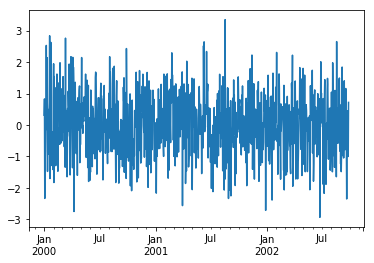

In [166]:
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))
s.plot()

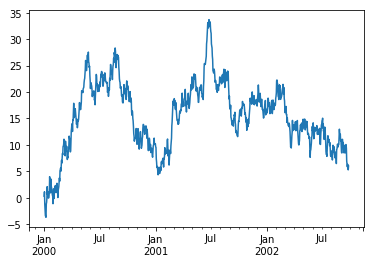

In [167]:
s = s.cumsum()
s.plot()

In [168]:
r = s.rolling(window=60)
r

Rolling [window=60,center=False,axis=0]

* r.agg         r.apply       r.count       r.exclusions  r.max         r.median      r.name        r.skew        r.sum
* r.aggregate   r.corr        r.cov         r.kurt        r.mean        r.min         r.quantile    r.std         r.var

In [169]:
r.mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-08          NaN
2000-01-09          NaN
2000-01-10          NaN
2000-01-11          NaN
2000-01-12          NaN
2000-01-13          NaN
2000-01-14          NaN
2000-01-15          NaN
2000-01-16          NaN
2000-01-17          NaN
2000-01-18          NaN
2000-01-19          NaN
2000-01-20          NaN
2000-01-21          NaN
2000-01-22          NaN
2000-01-23          NaN
2000-01-24          NaN
2000-01-25          NaN
2000-01-26          NaN
2000-01-27          NaN
2000-01-28          NaN
2000-01-29          NaN
2000-01-30          NaN
                ...    
2002-08-28    10.217359
2002-08-29    10.176110
2002-08-30    10.133990
2002-08-31    10.070044
2002-09-01    10.003352
2002-09-02     9.943256
2002-09-03     9.853134
2002-09-04     9.784570
2002-09-05     9.736256
2002-09-06     9.736532
2002-09-07     9

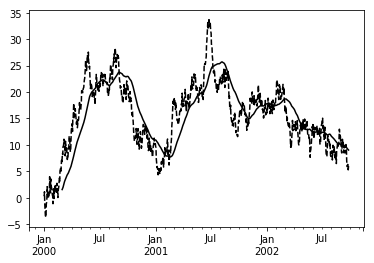

In [170]:
# 이동평균 추세선 그릴 때 rolling 사용
s.plot(style='k--')
r.mean().plot(style='k')

In [171]:
df = pd.DataFrame(np.random.randn(1000, 4),
                    index=pd.date_range('1/1/2000', periods=1000),
                    columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01-01,-1.119856,-1.256186,0.069730,-2.668486
2000-01-02,-0.668870,-0.163963,1.152245,-0.129551
2000-01-03,0.289650,0.807854,0.698245,1.145342
2000-01-04,-1.077149,1.302938,-0.232478,-1.915703
2000-01-05,0.076092,0.113274,1.396808,0.497552


In [172]:
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,-1.119856,-1.256186,0.069730,-2.668486
2000-01-02,-1.788726,-1.420148,1.221975,-2.798037
2000-01-03,-1.499076,-0.612294,1.920220,-1.652695
2000-01-04,-2.576224,0.690644,1.687742,-3.568398
2000-01-05,-2.500132,0.803918,3.084550,-3.070846


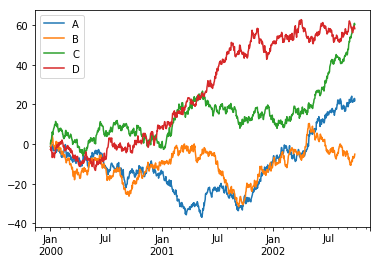

In [173]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a74b63860>,
      dtype=object)

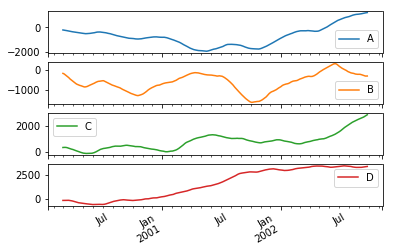

In [174]:
df.rolling(window=60).sum().plot(subplots=True)

In [175]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,-1.119856,-1.256186,0.069730,-2.668486
2000-01-02,-1.454291,-1.338167,0.645852,-2.733261
2000-01-03,-1.469219,-1.096209,1.070642,-2.373073
2000-01-04,-1.745970,-0.649496,1.224917,-2.671904
2000-01-05,-1.896803,-0.358813,1.596843,-2.751692


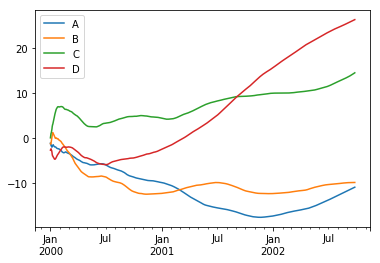

In [176]:
df.rolling(window=len(df), min_periods=1).mean().plot()

In [177]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,-1.119856,-1.256186,0.069730,-2.668486
2000-01-02,-1.454291,-1.338167,0.645852,-2.733261
2000-01-03,-1.469219,-1.096209,1.070642,-2.373073
2000-01-04,-1.745970,-0.649496,1.224917,-2.671904
2000-01-05,-1.896803,-0.358813,1.596843,-2.751692


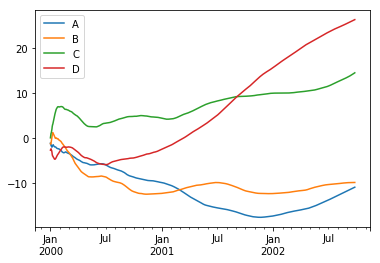

In [178]:
df.expanding(min_periods=1).mean().plot()

In [179]:
df.expanding?

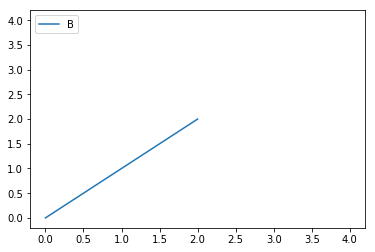

In [180]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df.plot()

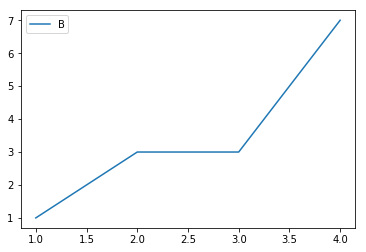

In [181]:
df.expanding(2).sum().plot()